In [1]:
import tweepy
import numpy as np
import pandas as pd
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
consumer_key = 'hRZhWltKq5rfE6pIj8TwgV7QG'
consumer_secret = 'fGlA8NQsDKJgd6AylkAXJcByWtl63ffRy0f3icUOALn8GgthxX'
access_token = '1381489465579855873-4DqvH0meHEA3GNDKdlh6KFlMPTklec'
access_secret = 'HGUXfSqklXnzHc4AzxC9o9FsLWzi3frznNa4ZtLCE1XJJ'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [4]:
results=[]

In [ ]:
for tweet in tweepy.Cursor(api.search, q='corona', lang="en").items(3000):
    if (not tweet.retweeted) and ('RT @' not in tweet.text) and (len(tweet.text)>20):
        results.append(tweet)
        id = tweet.id
print(len(results))

In [6]:
def process_result(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list,columns = ['id'])
    
    # Processing Tweet Data
    data_set["text"] = [tweet.text for tweet in results] #text of tweet
    data_set["created_at"] = [tweet.created_at for tweet in results] #when the tweet was created
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results] #number of retweets
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results] #number of favourites
    data_set["source"] = [tweet.source for tweet in results] #source of the tweet
    data_set["length"] = [len(tweet.text) for tweet in results] #number of characters in tweet

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results] #id of the author
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results] 
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results] #age of user account
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results] #number of followers
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results] #number of friends
    data_set["user_location"] = [tweet.author.location for tweet in results] #user has a location in profile?
    data_set["user_statuses_count"] = [tweet.author.statuses_count for tweet in results] #number of statuses
    data_set["user_verified"] = [tweet.author.verified for tweet in results] #user is verified?
    data_set["user_url"] = [tweet.author.url for tweet in results] #user has a URL?

    return data_set

In [7]:
data_set = process_result(results)

In [11]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1006 non-null   int64         
 1   text                  1006 non-null   object        
 2   created_at            1006 non-null   datetime64[ns]
 3   retweet_count         1006 non-null   int64         
 4   favorite_count        1006 non-null   int64         
 5   source                1006 non-null   object        
 6   length                1006 non-null   int64         
 7   user_id               1006 non-null   int64         
 8   user_screen_name      1006 non-null   object        
 9   user_name             1006 non-null   object        
 10  user_created_at       1006 non-null   datetime64[ns]
 11  user_description      1006 non-null   object        
 12  user_followers_count  1006 non-null   int64         
 13  user_friends_count

In [12]:
data_set.head()

,id,text,created_at,retweet_count,favorite_count,source,length,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location,user_statuses_count,user_verified,user_url
0,1388708328520314885,@priyaprasad26 @narendramodi I live in US. The...,2021-05-02 04:14:01,0,0,Twitter for Android,139,171754213,j1a1k2,Avi,2010-07-28 02:41:12,,4,14,"Vancouver, British Columbia",237,False,None
1,1388708288636678144,@chronolynx @lussuriioso It's been lost in the...,2021-05-02 04:13:51,0,0,Twitter Web App,139,3369410788,Caladrioose,Shitfartcumslut666,2015-07-10 15:21:58,27/He ⚣ R18\nVideo game man and W fan\nHorny a...,202,613,US,49197,False,None
2,1388708285277036552,@RajGovOfficial Honorable Chief Minister I req...,2021-05-02 04:13:50,0,0,Twitter for Android,140,711878854328098816,ms975927,mahendra singh 29,2016-03-21 11:35:19,,0,11,,7,False,None
3,1388708284668932106,@DSSNewsUpdates @Gurmeetramrahim @derasachasau...,2021-05-02 04:13:50,0,0,Twitter for Android,140,2214198590,IMGarry8,🅶🅰🆁🆁🆈,2013-11-25 14:57:21,"State Awardee (SBSI), Diploma in Computer. \n...",524,817,amɓala caŋtt. harɣaŋa,28752,False,https://t.co/Xx6nXHG24m
4,1388708275072299010,@rajeevkhullar20 @deekhush @jslaternyc @suhasi...,2021-05-02 04:13:48,0,0,Twitter for iPhone,140,1382554017893556224,DubbukuM,DisasterCalledModi,2021-04-15 04:39:45,I Love India 🇮🇳,12,116,,1008,False,None


<AxesSubplot:>

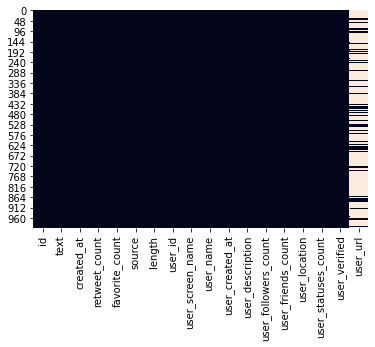

In [13]:
sns.heatmap(data_set.isnull(), cbar=False)

In [14]:
data_set['text'].head()

0    @priyaprasad26 @narendramodi I live in US. The...
1    @chronolynx @lussuriioso It's been lost in the...
2    @RajGovOfficial Honorable Chief Minister I req...
3    @DSSNewsUpdates @Gurmeetramrahim @derasachasau...
4    @rajeevkhullar20 @deekhush @jslaternyc @suhasi...
Name: text, dtype: object

In [15]:
data_set.to_csv("covid", index=False, encoding='utf-8')